In [21]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [22]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [23]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6739 entries, 1995-01-03 to 2021-10-06
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6739 non-null   float64
 1   MSFT    6739 non-null   float64
 2   F       6739 non-null   float64
 3   GE      6739 non-null   float64
dtypes: float64(4)
memory usage: 263.2 KB


In [24]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.063842,2.379198,4.380181,32.906113
1995-01-04,7.999200,2.396494,4.498033,32.906113
1995-01-05,7.886081,2.356963,4.458751,32.986755
1995-01-06,7.902239,2.396494,4.458751,32.825451
1995-01-09,7.869920,2.381670,4.537318,32.502853


In [25]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2021-09-30,139.800003,281.920013,14.16,103.029999
2021-10-01,139.580002,289.100006,14.16,105.820000
2021-10-04,138.789993,283.109985,14.35,104.900002
2021-10-05,139.330002,288.760010,14.29,104.900002
2021-10-06,141.190002,293.109985,14.12,104.330002


## 100に正規化：

$$
    \frac{P_t}{P_0} * 100
$$

In [27]:
mydata.iloc[0]

PG       8.063842
MSFT     2.379198
F        4.380181
GE      32.906113
Name: 1995-01-03 00:00:00, dtype: float64

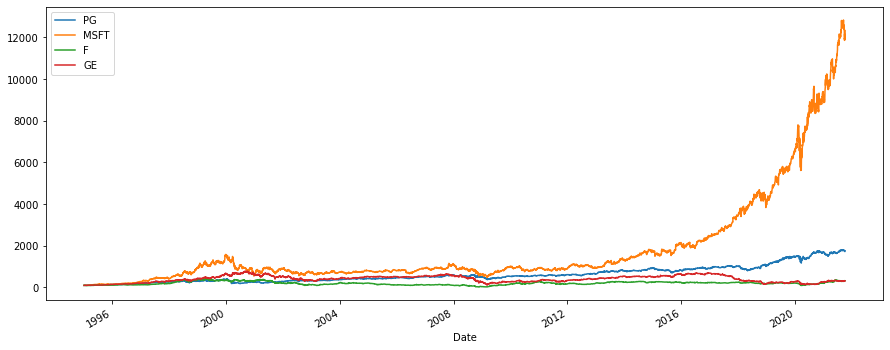

In [29]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

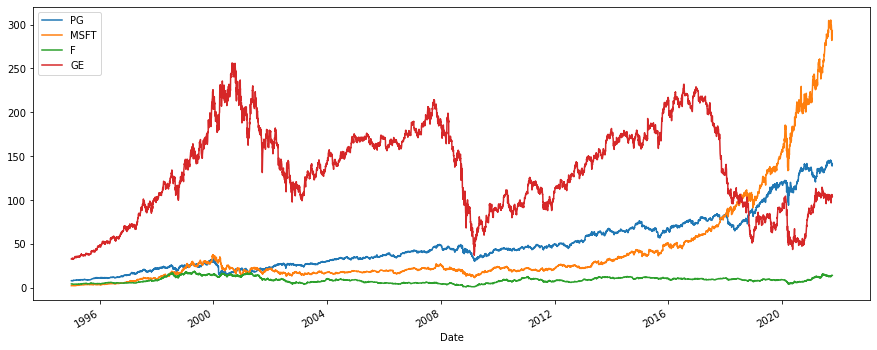

In [30]:
mydata.plot(figsize = (15, 6))
plt.show()

In [32]:
mydata.loc['1995-1-3']

PG       8.063842
MSFT     2.379198
F        4.380181
GE      32.906113
Name: 1995-01-03 00:00:00, dtype: float64

In [33]:
mydata.iloc[0]

PG       8.063842
MSFT     2.379198
F        4.380181
GE      32.906113
Name: 1995-01-03 00:00:00, dtype: float64

## 株式ポートフォリオの利益率の計算

In [34]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008733,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [35]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [36]:
np.dot(returns, weights)

array([        nan,  0.00653975, -0.00922974, ..., -0.00541383,
        0.00491665,  0.00277094])

In [37]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.131401
MSFT    0.227796
F       0.122973
GE      0.094219
dtype: float64

In [38]:
np.dot(annual_returns, weights)

0.14409735420748793

In [39]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 4) * 100) + ' %'
print(pfolio_1)

14.41 %


In [40]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [46]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print(pfolio_1)
print(pfolio_2)

14.41 %
16.683999999999997 %
